### Investigating network similarity for the analysis of fish behaviour

##### Works-out-of-the-box: PortraitDivergence, JaccardDistance, GED(networkx) 

##### Adding nodes: hamming, frobenius 

In [68]:
import os
import numpy as np
import netrd, networkx as nx
import statistics
import pandas as pd
import itertools
import matplotlib.pyplot as plt

def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

#lists with the files
oce_bvr = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/ocellatus-behaviours/")
mul_bvr = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/multi-behaviours/")
tem_bvr = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/tempo-behaviours/")

oce_ctg = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/ocellatus-categories/")
mul_ctg = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/multi-categories/")
tem_ctg = listdir_fullpath("/Users/nicol/Desktop/bachelorthesis/data/tempo-categories/")

behaviours = [oce_bvr, mul_bvr, tem_bvr]
categories = [oce_ctg, mul_ctg, tem_ctg]

# list with algorithms to apply
distance_algs =  [netrd.distance.DeltaCon(), 
                  netrd.distance.Hamming(),
                  netrd.distance.Frobenius(),
                  netrd.distance.PortraitDivergence(),
                  netrd.distance.JaccardDistance()]
#distance_algs = [netrd.distance.DeltaCon()]
#names 
algs = ['deltacon', 'hamming', 'frobenius', 'portrait_divergence', 'jaccard_distance']
#algs = ['deltacon']
#istance_algs = [netrd.distance.PortraitDivergence()]
same_nodes_algs = ['hamming', 'frobenius', 'deltacon']

results= []
df = pd.DataFrame(columns=['alg', 'data1', 'data2', 'results'])
general_df = pd.DataFrame(columns=['alg', 'data', 'type', 'results'])

for alg in distance_algs:
    alg_name = str(alg).split(".")[2]
    
    #lists for specieal results
    bhvr_across_species = []
    bhvr_within_species = []
    cat_across_species = []
    cat_within_species = []
    
    #BEHAVIOURS PAIRWISE
    for data1, data2 in itertools.combinations(behaviours, 2):
        #folder names for adding in dataframe
        folder1 = str(data1).split("/")[6]
        folder2 = str(data2).split("/")[6]
        #compare each folder with each other
        for a in data1:
            for b in data2:

                #read gpickles into networkx
                g1 = nx.read_gpickle(a)
                g2 = nx.read_gpickle(b)

                # if alg requires same nodeset, add nodes
                if alg_name in same_nodes_algs:    
                    not_in_g1 = np.setdiff1d(g2.nodes(),g1.nodes())
                    g1.add_nodes_from(not_in_g1)
                    not_in_g2 = np.setdiff1d(g1.nodes(),g2.nodes())
                    g2.add_nodes_from(not_in_g2)

                #calculate and append resul
                dist = alg
                d = dist.dist(g1, g2)
                results.append(d)
               


        #calculate statistics and append to across species list
        df.loc[len(df.index)] = [alg_name,folder1, folder2, results]
        bhvr_across_species.extend(results)
        results = []
        
    #add row for behaviours across species
    general_df.loc[len(df.index)] = [alg_name, 'across species', 'behaviours', bhvr_across_species]    
        
        
    #CATEGORIES PAIRWISE
    for data1, data2 in itertools.combinations(categories, 2):
        #folder names for adding in dataframe
        folder1 = str(data1).split("/")[6]
        folder2 = str(data2).split("/")[6]
        #compare each folder with each other
        for a in data1:
            for b in data2:

                #read gpickles into networkx
                g1 = nx.read_gpickle(a)
                g2 = nx.read_gpickle(b)

                # if alg requires same nodeset, add nodes
                if alg_name in same_nodes_algs:    
                    not_in_g1 = np.setdiff1d(g2.nodes(),g1.nodes())
                    g1.add_nodes_from(not_in_g1)
                    not_in_g2 = np.setdiff1d(g1.nodes(),g2.nodes())
                    g2.add_nodes_from(not_in_g2)

               
                dist = alg
                d = dist.dist(g1, g2)
                results.append(d)
                
        #calculate statistics
        df.loc[len(df.index)] = [alg_name,folder1, folder2, results]
        cat_across_species.extend(results)
        results = []
        
    #add row for behaviours across species
    general_df.loc[len(df.index)] = [alg_name, 'across species', 'behavioural category', cat_across_species]  
        
    #CATEGORIES SINGLE
    for data in categories:
        #folder names for adding in dataframe
        folder1 = str(data).split("/")[6]
        folder2 = str(data).split("/")[6]
        #compare each folder with each other
        for a,b in itertools.combinations(data, 2):

                #read gpickles into networkx
                g1 = nx.read_gpickle(a)
                g2 = nx.read_gpickle(b)

                # if alg requires same nodeset, add nodes
                if alg_name in same_nodes_algs:    
                    not_in_g1 = np.setdiff1d(g2.nodes(),g1.nodes())
                    g1.add_nodes_from(not_in_g1)
                    not_in_g2 = np.setdiff1d(g1.nodes(),g2.nodes())
                    g2.add_nodes_from(not_in_g2)

                
                dist = alg
                d = dist.dist(g1, g2)
                results.append(d)

        #calculate statistics
        df.loc[len(df.index)] = [alg_name,folder1, folder2, results]
        cat_within_species.extend(results)
        results = []
        
    #add row for behaviours across species
    general_df.loc[len(df.index)] = [alg_name, 'within species', 'behavioural category', cat_within_species]  
        
        
    #BEHAVIOURS SINGLE
    for data in behaviours:
        #folder names for adding in dataframe
        folder1 = str(data).split("/")[6]
        folder2 = str(data).split("/")[6]
        #compare each folder with each other
        for a,b in itertools.combinations(data, 2):

                #read gpickles into networkx
                g1 = nx.read_gpickle(a)
                g2 = nx.read_gpickle(b)

                # if alg requires same nodeset, add nodes
                if alg_name in same_nodes_algs:    
                    not_in_g1 = np.setdiff1d(g2.nodes(),g1.nodes())
                    g1.add_nodes_from(not_in_g1)
                    not_in_g2 = np.setdiff1d(g1.nodes(),g2.nodes())
                    g2.add_nodes_from(not_in_g2)

               
                dist = alg
                d = dist.dist(g1, g2)
                results.append(d)

        #calculate statistics
        df.loc[len(df.index)] = [alg_name,folder1, folder2, results]
        bhvr_within_species.extend(results)
        results = []
        
    #add row for behaviours across species
    general_df.loc[len(df.index)] = [alg_name, 'within species', 'behaviours', bhvr_within_species] 
general_df

C:\Users\nicol\anaconda3\envs\fish\lib\site-packages\netrd\utilities\graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)


,alg,data,type,results
3,deltacon,across species,behaviours,"[2.687838714816187, 2.1551566857478925, 3.1879..."
6,deltacon,across species,behavioural category,"[1.4039680243155717, 0.9552118351021708, 2.193..."
9,deltacon,within species,behavioural category,"[0.7548181295411402, 1.2775262911231116, 0.986..."
12,deltacon,within species,behaviours,"[2.3996078741887805, 2.2697957556303683, 2.208..."
15,hamming,across species,behaviours,"[0.11072664359861592, 0.1575, 0.1536, 0.15, 0...."
18,hamming,across species,behavioural category,"[0.25, 0.25, 0.359375, 0.3055555555555556, 0.3..."
21,hamming,within species,behavioural category,"[0.32, 0.4, 0.25, 0.44, 0.48, 0.4, 0.32, 0.4, ..."
24,hamming,within species,behaviours,"[0.21453287197231835, 0.13019390581717452, 0.1..."
27,frobenius,across species,behaviours,"[5.656854249492381, 7.937253933193772, 9.79795..."
30,frobenius,across species,behavioural category,"[3.0, 3.0, 4.795831523312719, 3.3166247903554,..."


In [69]:
df

,alg,data1,data2,results
0,deltacon,ocellatus-behaviours,multi-behaviours,"[2.687838714816187, 2.1551566857478925, 3.1879..."
1,deltacon,ocellatus-behaviours,tempo-behaviours,"[2.683636567317491, 2.3428786601921696, 2.3728..."
2,deltacon,multi-behaviours,tempo-behaviours,"[3.4832396688003673, 2.2427754023167834, 2.558..."
3,deltacon,ocellatus-categories,multi-categories,"[1.4039680243155717, 0.9552118351021708, 2.193..."
4,deltacon,ocellatus-categories,tempo-categories,"[2.10594898685723, 1.1975366282350515, 1.54108..."
5,deltacon,multi-categories,tempo-categories,"[2.563842197273889, 2.0258364248516982, 2.1305..."
6,deltacon,ocellatus-categories,ocellatus-categories,"[0.7548181295411402, 1.2775262911231116, 0.986..."
7,deltacon,multi-categories,multi-categories,"[1.8697272982781976, 2.611265716982618, 2.4477..."
8,deltacon,tempo-categories,tempo-categories,"[1.6928689764278502, 1.6390730641628812, 1.920..."
9,deltacon,ocellatus-behaviours,ocellatus-behaviours,"[2.3996078741887805, 2.2697957556303683, 2.208..."


In [70]:
# add new column 'type' and remove type from data-columns
df['type'] = df.data1

#changing type 
type_mapping = [
    (df['type'] == 'multi-categories', 'behavioural category'),
    (df['type'] == 'tempo-categories', 'behavioural category'),
    (df['type'] == 'ocellatus-categories', 'behavioural category'),
    
    (df['type'] == 'ocellatus-behaviours', 'behaviour'),
    (df['type'] == 'multi-behaviours', 'behaviour'),
    (df['type'] == 'tempo-behaviours', 'behaviour'),
]
condlist = [item[0] for item in type_mapping]
choicelist = [item[1] for item in type_mapping]


df['type'] = np.select(condlist, choicelist)

#changing data column
data1_mapping = [
    (df['data1'] == 'multi-categories', 'multi'),
    (df['data1'] == 'tempo-categories', 'tempo'),
    (df['data1'] == 'ocellatus-categories', 'oclts'),
    
    (df['data1'] == 'ocellatus-behaviours', 'oclts'),
    (df['data1'] == 'multi-behaviours', 'multi'),
    (df['data1'] == 'tempo-behaviours', 'tempo'),
]
condlist = [item[0] for item in data1_mapping]
choicelist = [item[1] for item in data1_mapping]


df['data1'] = np.select(condlist, choicelist)

#changing data2 column
data1_mapping = [
    (df['data2'] == 'multi-categories', 'multi'),
    (df['data2'] == 'tempo-categories', 'tempo'),
    (df['data2'] == 'ocellatus-categories', 'oclts'),
    
    (df['data2'] == 'ocellatus-behaviours', 'oclts'),
    (df['data2'] == 'multi-behaviours', 'multi'),
    (df['data2'] == 'tempo-behaviours', 'tempo'),
]
condlist = [item[0] for item in data1_mapping]
choicelist = [item[1] for item in data1_mapping]


df['data2'] = np.select(condlist, choicelist)
df

,alg,data1,data2,results,type
0,deltacon,oclts,multi,"[2.687838714816187, 2.1551566857478925, 3.1879...",behaviour
1,deltacon,oclts,tempo,"[2.683636567317491, 2.3428786601921696, 2.3728...",behaviour
2,deltacon,multi,tempo,"[3.4832396688003673, 2.2427754023167834, 2.558...",behaviour
3,deltacon,oclts,multi,"[1.4039680243155717, 0.9552118351021708, 2.193...",behavioural category
4,deltacon,oclts,tempo,"[2.10594898685723, 1.1975366282350515, 1.54108...",behavioural category
5,deltacon,multi,tempo,"[2.563842197273889, 2.0258364248516982, 2.1305...",behavioural category
6,deltacon,oclts,oclts,"[0.7548181295411402, 1.2775262911231116, 0.986...",behavioural category
7,deltacon,multi,multi,"[1.8697272982781976, 2.611265716982618, 2.4477...",behavioural category
8,deltacon,tempo,tempo,"[1.6928689764278502, 1.6390730641628812, 1.920...",behavioural category
9,deltacon,oclts,oclts,"[2.3996078741887805, 2.2697957556303683, 2.208...",behaviour


### plots
erste zeile ist titel, 
2te (2te und 3te) sind x-achsenabschnitte,
median,max,min sind spritzen-y-gemappt


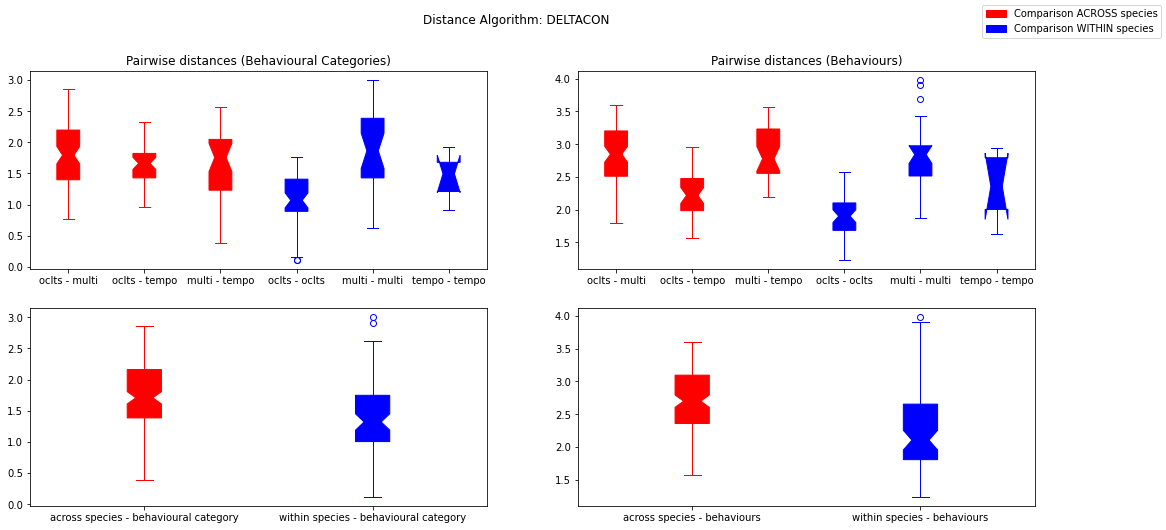

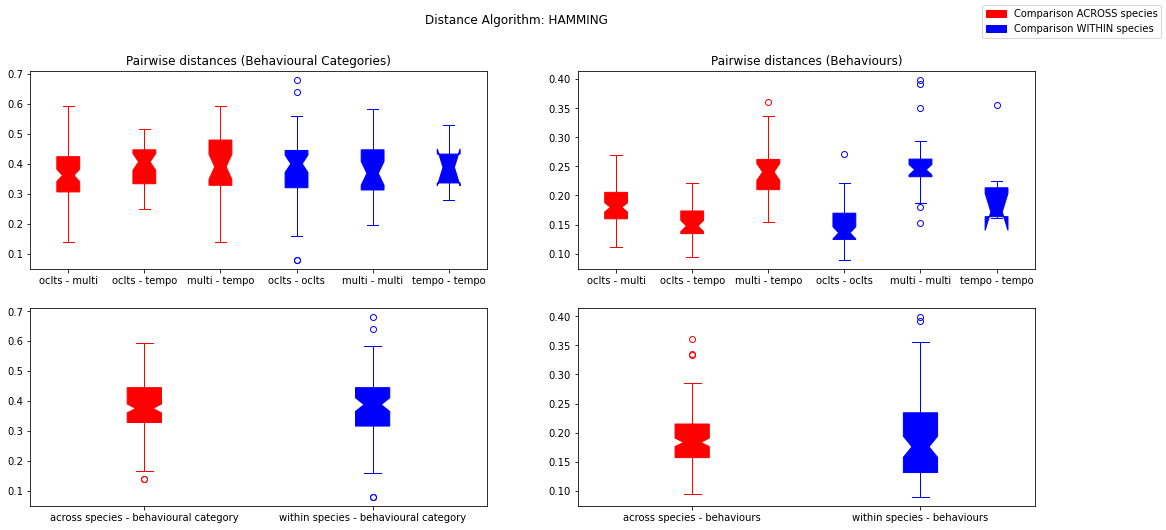

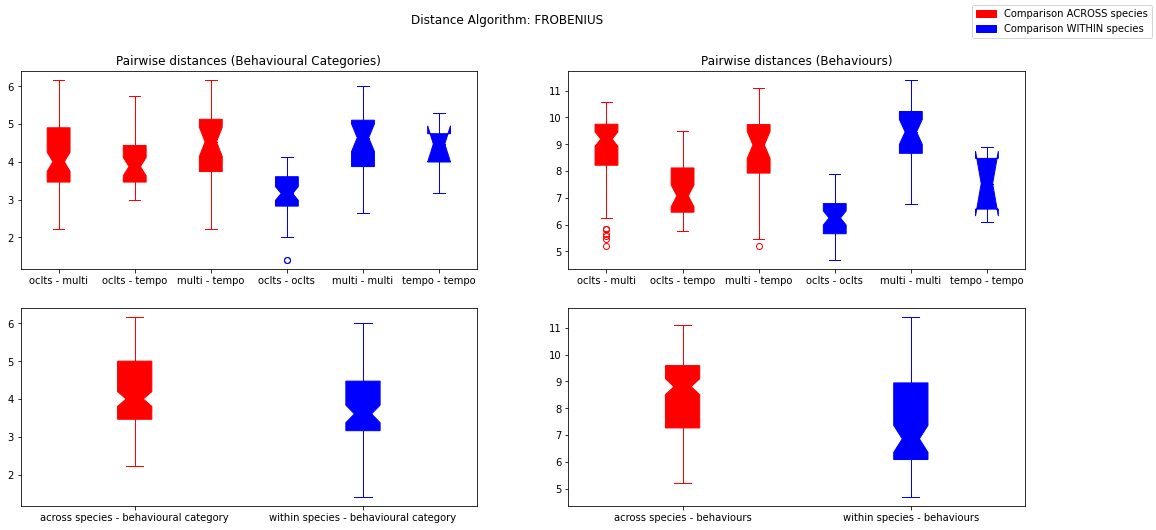

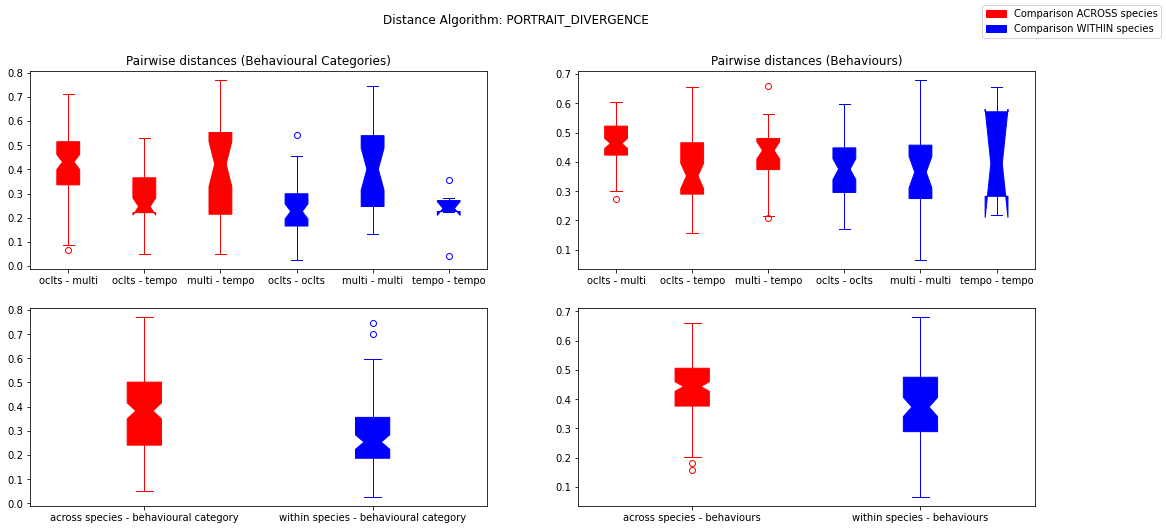

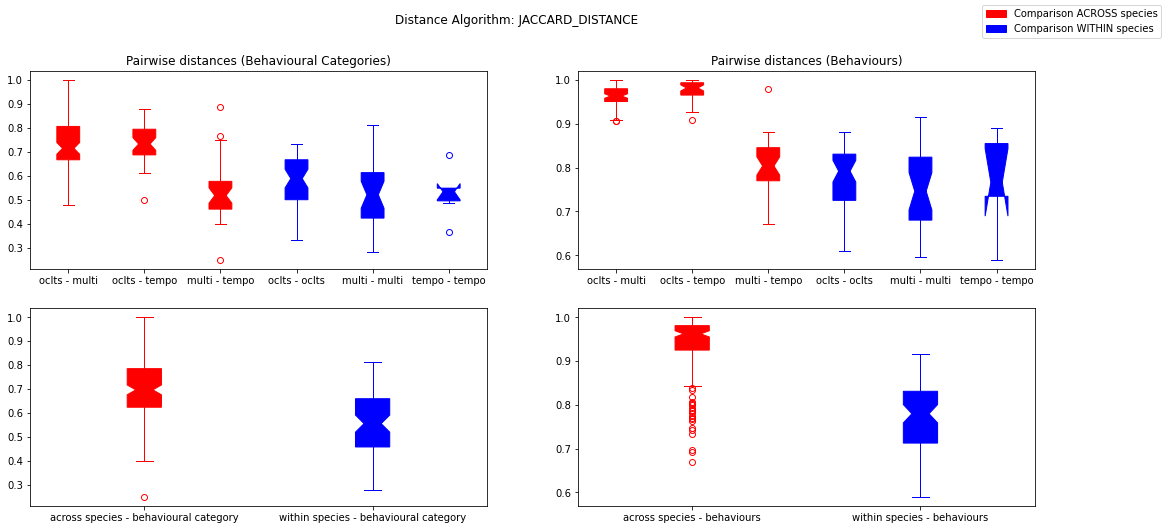

In [85]:
import matplotlib.patches as mpatches


for alg in algs:
    alg_df = df[df.alg == alg]
    
    #behavioural category data gen
    bhvr_df = alg_df[alg_df.type == 'behavioural category']
    data = []
    labels = []
    i=0
    while (i < len(bhvr_df)):
        data.append(bhvr_df.iloc[i]['results'])
        labels.append(bhvr_df.iloc[i]['data1'] + " - " +bhvr_df.iloc[i]['data2'])
        i = i+1
        
    #behaviour data gen
    bhvr_df = alg_df[alg_df.type == 'behaviour']
    data_bhvr = []
    labels_bhvr = []
    i=0
    while (i < len(bhvr_df)):
        data_bhvr.append(bhvr_df.iloc[i]['results'])
        labels_bhvr.append(bhvr_df.iloc[i]['data1'] + " - " +bhvr_df.iloc[i]['data2'])
        i = i+1
        
       
    #behavioural category plot
    c = 'red'
    fig, axs = plt.subplots(2,2, figsize=(18,8))
    axs[0,0].boxplot(data[:3], positions=[1,2,3], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    c='blue'
    axs[0,0].boxplot(data[3:], positions=[4,5,6], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    axs[0,0].set_title('Pairwise distances (Behavioural Categories)')
    axs[0,0].set_xticklabels(labels)
    
    #behaviour plot
    c = 'red'
    axs[0,1].boxplot(data_bhvr[:3], positions=[1,2,3], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    c='blue'
    axs[0,1].boxplot(data_bhvr[3:], positions=[4,5,6], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            
            )
    axs[0,1].set_title('Pairwise distances (Behaviours)')
    axs[0,1].set_xticklabels(labels_bhvr)
    
    #title
    fig.suptitle("Distance Algorithm: " + alg.upper())
    
    
    
    
    
# generalized data plots below normal data

    alg_df = general_df[general_df.alg == alg]

    #behavioural category data gen
    bhvr_df = alg_df[alg_df.type == 'behavioural category']
    data = []
    labels = []
    i=0
    while (i < len(bhvr_df)):
        data.append(bhvr_df.iloc[i]['results'])
        labels.append(bhvr_df.iloc[i]['data'] + " - " +bhvr_df.iloc[i]['type'])
        i = i+1

    #behaviour data gen
    bhvr_df = alg_df[alg_df.type == 'behaviours']
    data_bhvr = []
    labels_bhvr = []
    i=0
    while (i < len(bhvr_df)):
        data_bhvr.append(bhvr_df.iloc[i]['results'])
        labels_bhvr.append(bhvr_df.iloc[i]['data'] + " - " +bhvr_df.iloc[i]['type'])
        i = i+1

       
    #behavioural category plot
    c = 'red'
    axs[1,0].boxplot(data[:1], positions=[1], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    c='blue'
    axs[1,0].boxplot(data[1:], positions=[2], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    axs[1,0].set_xticklabels(labels)
    
    
    #general behaviour plot
    c = 'red'
    axs[1,1].boxplot(data_bhvr[:1], positions=[1], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
    c='blue'
    axs[1,1].boxplot(data_bhvr[1:], positions=[2], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
   
    axs[1,1].set_xticklabels(labels_bhvr)

    
    
    
    # Adding title and legend
    red_patch = mpatches.Patch(color='red', label='Comparison ACROSS species')
    blue_patch = mpatches.Patch(color='blue', label='Comparison WITHIN species')
    fig.legend(handles=[red_patch, blue_patch])
    # show plot
    plt.show()
    



In [ ]:
import time

#GED not working, laptop is failing

results= []
networkx_algs = ['ged']
for alg in networkx_algs:
    alg_name = alg
    
    #BEHAVIOURS PAIRWISE
    for data1, data2 in itertools.combinations(behaviours, 2):
        #folder names for adding in dataframe
        folder1 = str(data1).split("/")[6]
        folder2 = str(data2).split("/")[6]
        #compare each folder with each other
        for a in data1:
            for b in data2:

                #read gpickles into networkx
                g1 = nx.read_gpickle(a)
                g2 = nx.read_gpickle(b)

                #networkx optimized function for graph edit distance
                timeout = time.time() + 5
                for v in nx.optimize_graph_edit_distance(g1, g2):
                    minv = v
                    print(time.time())
                    if time.time() > timeout:
                        break
                results.append(minv)
                print(minv)


        #calculate statistics
        df.loc[len(df.index)] = [alg_name,folder1, folder2, results]
        results = []
        
        
df






    


1625571534.515915
1625571534.523912
1625571534.551911
1625571535.5079672
1625571545.265967
33.0
1625571545.2779996
1625571545.2979636
1625571545.930006
1625571545.9422467
1625571548.6392412
1625571548.6552415
1625571555.4129596
43.0
1625571555.4194965
1625571555.4351223
1625571556.2152314
1625571559.9429808
1625571561.3319411
85.0
1625571561.3500252
1625571561.360102
1625571561.4125695
1625571572.0772448
40.0
1625571572.0929024
1625571572.139765
1625571572.3402808
1625571572.8104925
1625571574.3835266
